In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


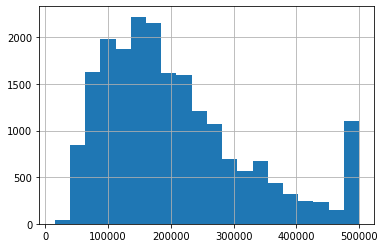

In [3]:
# look at the distribution median_house_value
df['median_house_value'].hist(bins = 20);


### this distribution has long tail

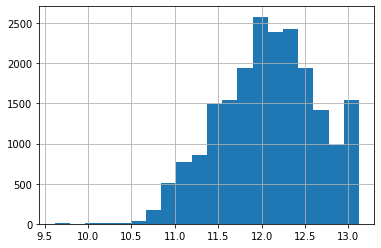

In [4]:
# it's look like log-norm distribution
np.log(df['median_house_value']).hist(bins = 20);

In [5]:
# just need columns 
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
        'households', 'median_income','median_house_value']]

In [6]:
# Find a feature with missing values. How many missing values does it have?
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [7]:
# What's the median (50% percentile) for variable 'population'?
df['population'].median()

1166.0

In [8]:
# Shuffle the initial dataset, use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Make sure that the target value ('median_house_value') is not in your dataframe.
# Apply the log transformation to the median_house_value variable using the np.log1p() function.

np.random.seed(42) # fix random seed

n = df.shape[0]
n_test_valid = int(n*0.2)
n_train = n - 2 * n_test_valid
idx = np.arange(n)
np.random.shuffle(idx)

In [9]:
# check how we separate dataset 
print(n, n_train + 2*n_test_valid)

20640 20640


In [10]:
df_train = df.iloc[idx[:n_train]]
df_valid = df.iloc[idx[n_train:n_train + n_test_valid]]
df_test = df.iloc[idx[n_train + n_test_valid:]]

In [11]:
# check length 
df.shape[0], df_train.shape[0] + df_valid.shape[0] + df_test.shape[0]

(20640, 20640)

In [12]:
# whatch dataset 
print('---------train----------')
display(df_train.head()) 
print('---------valid----------')
display(df_valid.head())
print('---------test----------')
display(df_test.head())

---------train----------


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


---------valid----------


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19660,37.51,-120.85,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
4415,34.09,-118.25,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
18113,37.31,-122.02,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
17673,37.30,-121.88,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
16992,37.56,-122.27,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0


---------test----------


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9221,37.13,-120.26,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
10234,33.86,-117.91,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
4763,34.04,-118.36,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
9062,34.69,-118.15,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
1874,38.93,-119.97,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0


In [13]:
# separate target and data 
X_train = df_train.drop(columns = ['median_house_value'])
y_train = np.log1p(df_train['median_house_value'])

X_valid = df_valid.drop(columns = ['median_house_value'])
y_valid = np.log1p(df_valid['median_house_value'])

X_test = df_test.drop(columns = ['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

In [14]:
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?

# function train linear regression 
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [15]:
# define own exception 
class ExceptionUnknownType(Exception):
    """Raised when unknown type"""
    pass

def preparation(X_train , X_valid, X_test, columns : list, methodology = 'zero') -> (np.array , np.array, np.array):
    if methodology == 'zero':
        for col in columns: 
            for X in [X_train, X_valid, X_test]:
                X[col] = X[col].fillna(0)
        return X_train.values, X_valid.values, X_test.values
    elif methodology == 'mean':
        for col in columns:
            mean_val = X_train[col].mean()
            for X in [X_train, X_valid, X_test]:
                X[col] = X[col].fillna(mean_val)
        return X_train.values, X_valid.values, X_test.values
    else: 
        raise ExceptionUnknownType('unknown methodology')

        

In [16]:
# RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

-----------zero-----------
RMSE: 0.33


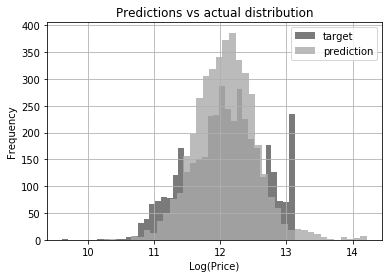

-----------mean-----------
RMSE: 0.33


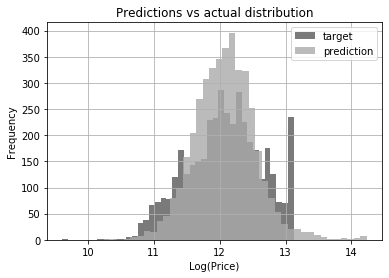

In [17]:
# try to 2 methology 
for method in ['zero', 'mean']:
    print('-----------{}-----------'.format(method))
    X_train_val, X_valid_val, X_test_val = preparation(X_train.copy() , X_valid.copy(), X_test.copy(), ['total_bedrooms'], method)
    
    w_0, w_other = train_linear_regression(X_train_val, y_train)
    y_pred = w_0 + X_valid_val.dot(w_other)
    print('RMSE: {}'.format(round(rmse(y_valid, y_pred),2)))
    # look at the graphic
    plt.figure(figsize=(6, 4))

    plt.hist(y_valid, label='target', color='#222222', alpha=0.6, bins=40)
    plt.hist(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

    plt.legend()
    plt.ylabel('Frequency')
    plt.xlabel('Log(Price)')
    plt.title('Predictions vs actual distribution')
    plt.grid(True)
    plt.show()

In [18]:
# регулязация 
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [19]:
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?
# If there are multiple options, select the smallest r.

# try to find best r
for r_val in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    print('-----------{}-----------'.format(r_val))
    X_train_val, X_valid_val, X_test_val = preparation(X_train.copy() , X_valid.copy(), X_test.copy(), ['total_bedrooms'], 'zero')
    
    w_0, w_other = train_linear_regression_reg(X_train_val, y_train, r_val)
    y_pred = w_0 + X_valid_val.dot(w_other)
    print('RMSE: {}'.format(round(rmse(y_valid, y_pred),2)))

-----------0-----------
RMSE: 0.33
-----------1e-06-----------
RMSE: 0.33
-----------0.0001-----------
RMSE: 0.33
-----------0.001-----------
RMSE: 0.33
-----------0.01-----------
RMSE: 0.33
-----------0.1-----------
RMSE: 0.33
-----------1-----------
RMSE: 0.33
-----------5-----------
RMSE: 0.34
-----------10-----------
RMSE: 0.34


In [20]:
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

In [21]:
RMSE_result = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s) # fix random seed

    n = df.shape[0]
    n_test_valid = int(n*0.2)
    n_train = n - 2 * n_test_valid
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_valid = df.iloc[idx[n_train:n_train + n_test_valid]]
    df_test = df.iloc[idx[n_train + n_test_valid:]]
    
    
    # separate target and data 
    X_train = df_train.drop(columns = ['median_house_value'])
    y_train = np.log1p(df_train['median_house_value'])

    X_valid = df_valid.drop(columns = ['median_house_value'])
    y_valid = np.log1p(df_valid['median_house_value'])

    X_test = df_test.drop(columns = ['median_house_value'])
    y_test = np.log1p(df_test['median_house_value'])
    
    X_train_val, X_valid_val, X_test_val = preparation(X_train.copy() , X_valid.copy(), X_test.copy(), ['total_bedrooms'], 'zero')
    # train model 
    w_0, w_other = train_linear_regression(X_train_val, y_train)
    y_pred = w_0 + X_valid_val.dot(w_other)
    
    RMSE_result.append(round(rmse(y_valid, y_pred), 2))
    
print(round(np.std(RMSE_result),3))   

0.005


In [22]:
# question 6 
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

np.random.seed(9) # fix random seed

n = df.shape[0]
n_test_valid = int(n*0.2)
n_train = n - 2 * n_test_valid
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_valid = df.iloc[idx[n_train:n_train + n_test_valid]]
df_test = df.iloc[idx[n_train + n_test_valid:]]


# separate target and data 
X_train = df_train.drop(columns = ['median_house_value'])
y_train = np.log1p(df_train['median_house_value'])

X_valid = df_valid.drop(columns = ['median_house_value'])
y_valid = np.log1p(df_valid['median_house_value'])

X_test = df_test.drop(columns = ['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

X_train_val, X_valid_val, X_test_val = preparation(X_train.copy() , X_valid.copy(), X_test.copy(), ['total_bedrooms'], 'zero')

# union our dataset
X_train_valid = np.concatenate((X_train_val, X_valid_val), axis = 0)
y_train_valid = pd.concat([y_train, y_valid])

# train model 
w_0, w_other = train_linear_regression_reg(X_train_valid, y_train_valid, r=0.001)
y_pred = w_0 + X_test_val.dot(w_other)

print(round(rmse(y_test, y_pred), 2))

0.35
